<a href="https://colab.research.google.com/github/yoondaeng/ICE4104-AI-Applications/blob/main/Lab8_CNN_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Image Classification Using Convolutional Neural Networks (CNN)

### 1.1. Fashion MNIST Dataset Load

In [36]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 채널 차원 추가, 흑백 이미지라 채널 1개 추가
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 0~255사이의 값은 너무 크니까 0~1사이의 값으로 스케일링

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

### 1.2. Creating a CNN

In [37]:
model = keras.Sequential()

# First convolution layer
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1))) # padding='same' 입력과 출력이 같게
# First pooling layer
model.add(keras.layers.MaxPooling2D(2)) # 최댓값이 2인 맥스풀링

# Second convolution & pooling layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 여기서부터는 FC NN 풀리커넥티드 뉴럴네트워크 연산 진행!!
# Flatten
model.add(keras.layers.Flatten())
# Dense hidden layer
model.add(keras.layers.Dense(100, activation='relu'))
# Dropout layer
model.add(keras.layers.Dropout(0.4))
# Output layer
model.add(keras.layers.Dense(10, activation='softmax'))

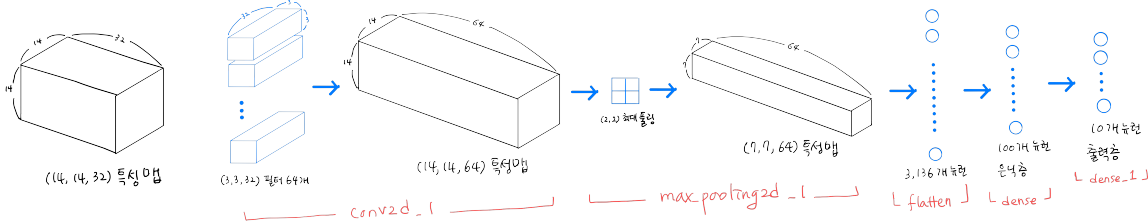

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

### 1.3. Model compile and training

* **Callback** : training 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* **ModelCheckpoint callback** : 에포크마다 모델 저장
    * save_best_only=True : 가장 낮은 validation score를 만드는 모델을 저장
* **Early Stopping** : overfitting이 시작되기 전에 training을 미리 중지하는 것
* **EarlyStopping callback**
    * patience : valdiation score가 향상되지 않더라도 진행할 에포크 횟수
    * restore_best_weights=True : 가장 낮은 validation loss를 낸 모델 파라미터로 되돌림





In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# 체크포인트 파일 생성
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5209 - accuracy: 0.8129 - val_loss: 0.3387 - val_accuracy: 0.8763
Epoch 2/20
  31/1500 [..............................] - ETA: 5s - loss: 0.3366 - accuracy: 0.8810

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.3428 - accuracy: 0.8787 - val_loss: 0.2916 - val_accuracy: 0.8901
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2935 - accuracy: 0.8942 - val_loss: 0.2572 - val_accuracy: 0.9047
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2641 - accuracy: 0.9038 - val_loss: 0.2432 - val_accuracy: 0.9101
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2409 - accuracy: 0.9126 - val_loss: 0.2409 - val_accuracy: 0.9131
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2226 - accuracy: 0.9183 - val_loss: 0.2265 - val_accuracy: 0.9188
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2064 - accuracy: 0.9231 - val_loss: 0.2311 - val_accuracy: 0.9151
Epoch 8/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1932 - accuracy: 0.9284 - val_loss: 0.2253 - val_accuracy: 0.9230
Epo

# 2.Visualization of CNNs

## 2.1. Weight Visualization

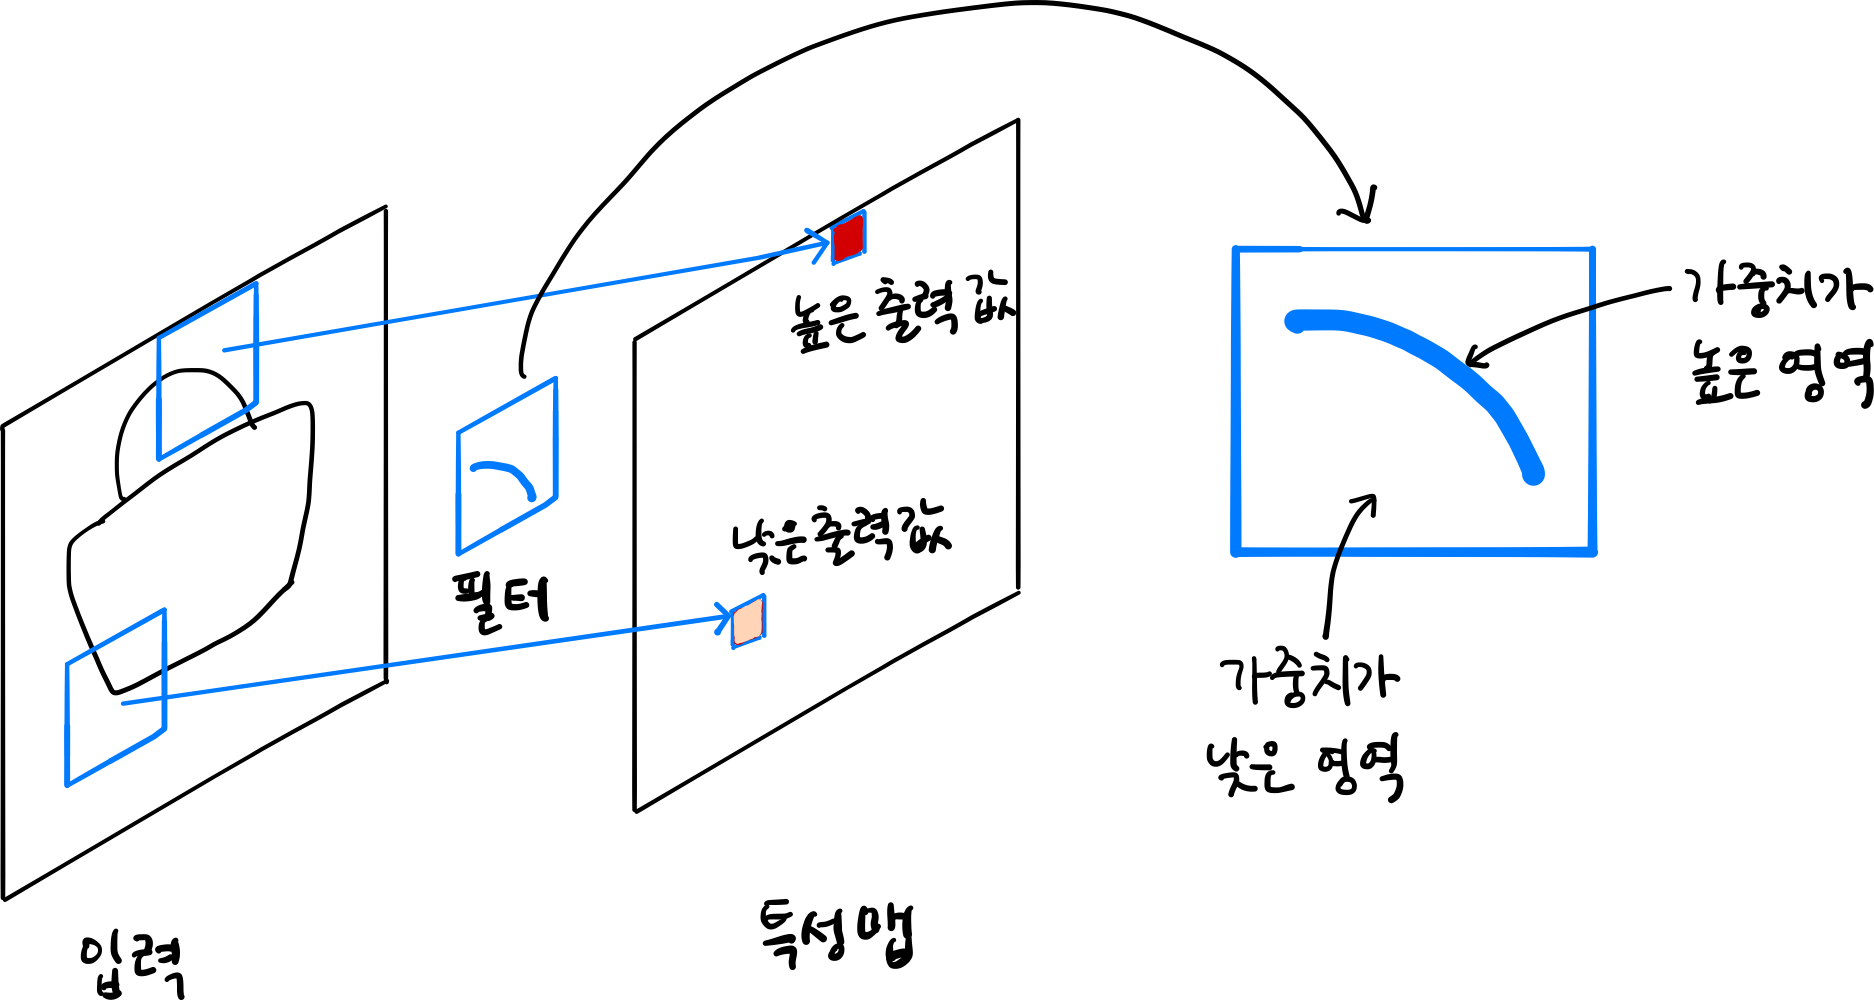

## 예시) 가방의 손잡이 필터

필터가 손잡이 모양에 대해서는 큰 값을 가지고 나머지는 작은 값을 가짐

가중치가 높은 영역과 가중치가 낮은 영역 존재


In [40]:
# 체크포인트 파일 load
model = keras.models.load_model('best-cnn-model.h5') # 학습한 모델을 다시 불러옴

In [41]:
model.layers

In [42]:
conv = model.layers[0]

# weights의 첫 번째 원소 = 필터 = weight, 두 번째 원소 = bias
print(conv.weights[0].shape, conv.weights[1].shape)
# 32개의 필터마다 bias가 있으므로 32가 출력

(3, 3, 1, 32) (32,)


In [43]:
print(conv.activation)

<function relu at 0x7cbd11497760>


In [44]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std()) # 평균과 분산

-0.003402495 0.20980631


In [45]:
import matplotlib.pyplot as plt

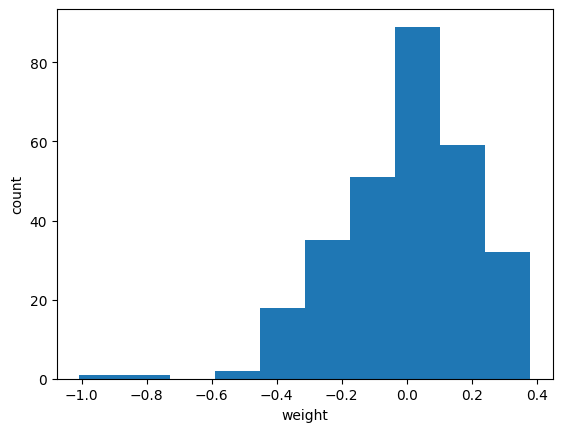

In [46]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

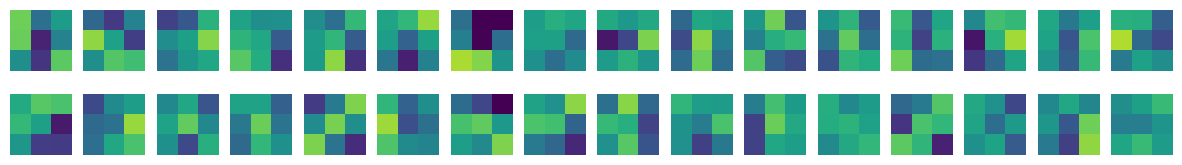

In [47]:
# conv_weights[:,:,0,0] ~ conv_weights[:,:,0,31]까지 출력
# 32개의 3x3 각각의 이미지 출력
# 학습을 하게 되면 어떤 부분에 큰 값을 넣어야하는지 배우게 됨

fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [48]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [49]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [50]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std()) # 평균, 분산도 작은 값

-0.0005648453 0.082539


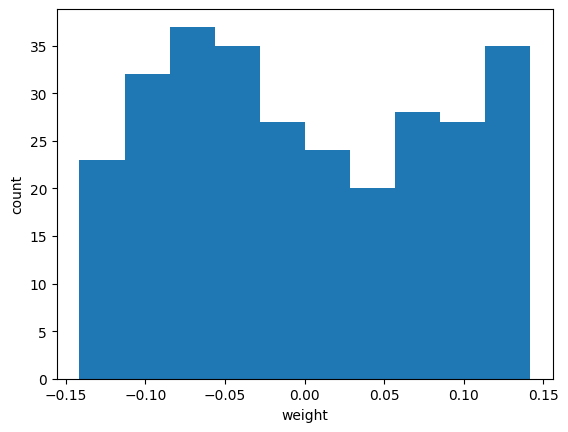

In [51]:
# 히스토그램 균일하게 분포
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

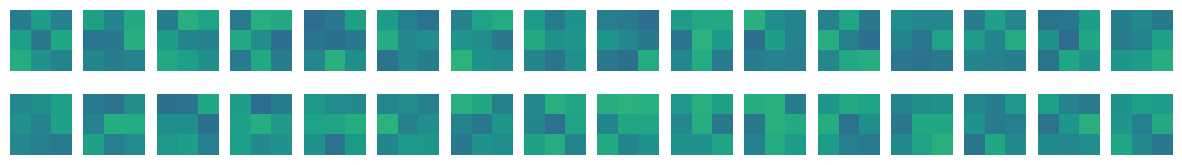

In [52]:
# 색상의 차이가 뚜렷하게 나오지 않음, 그냥 랜덤하게 분포한 것이므로
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 2.2. Functional API

dense1 = keras.layers.Dense(100, activation='sigmoid')

dense2 = keras.layers.Dense(10, activation='softmax')

⬇

hidden = dense1(inputs)

outputs = dense2(hidden)

model = keras.Model(inputs, outputs)

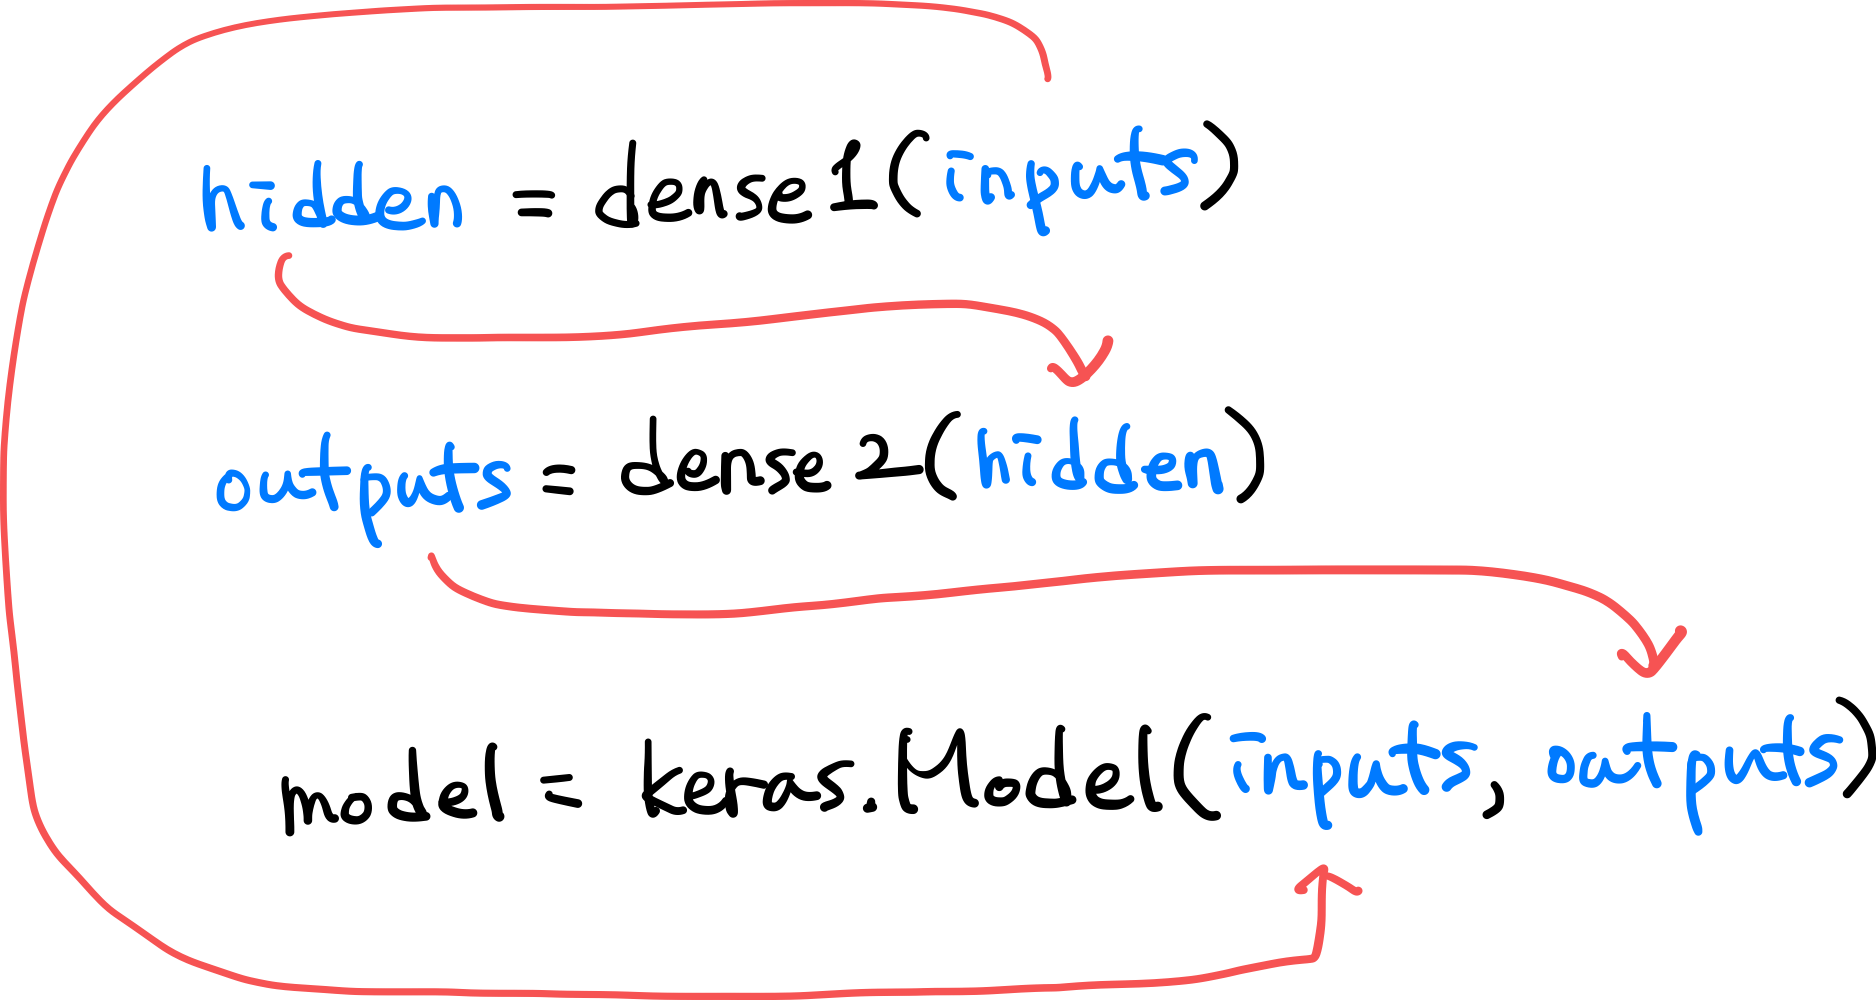

inputs = keras.Input(shape=(784,))

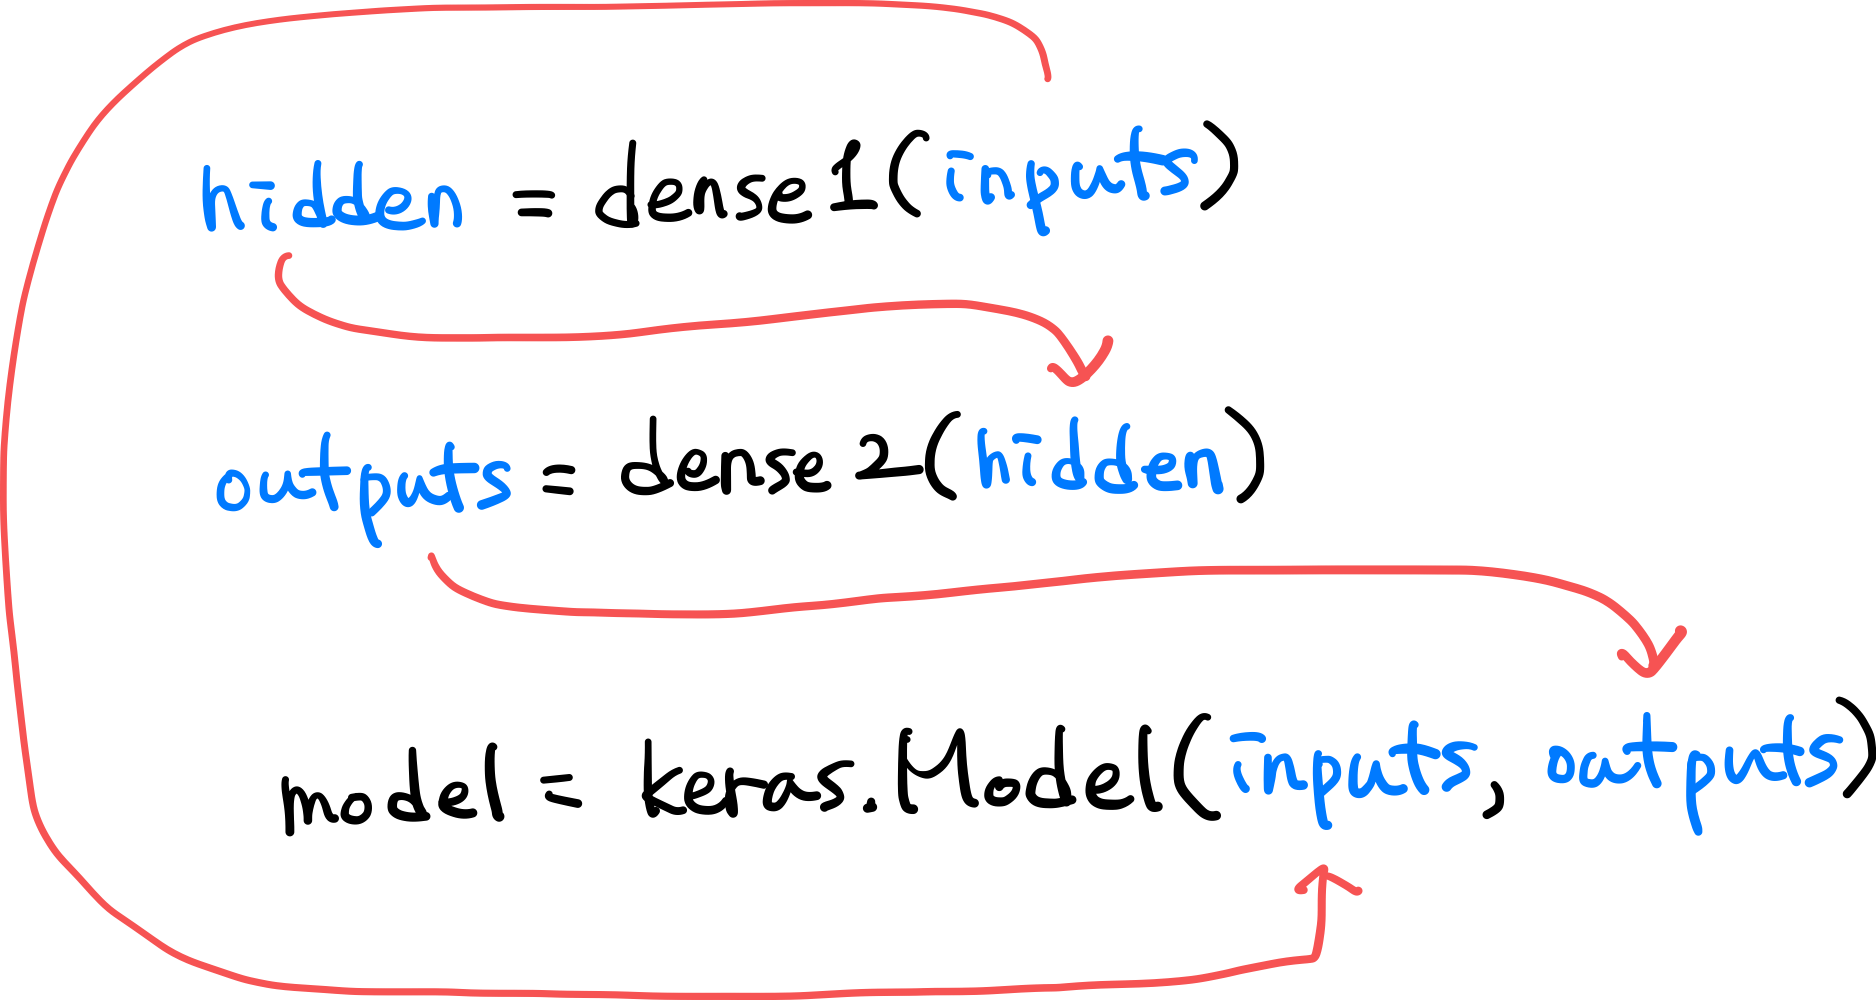

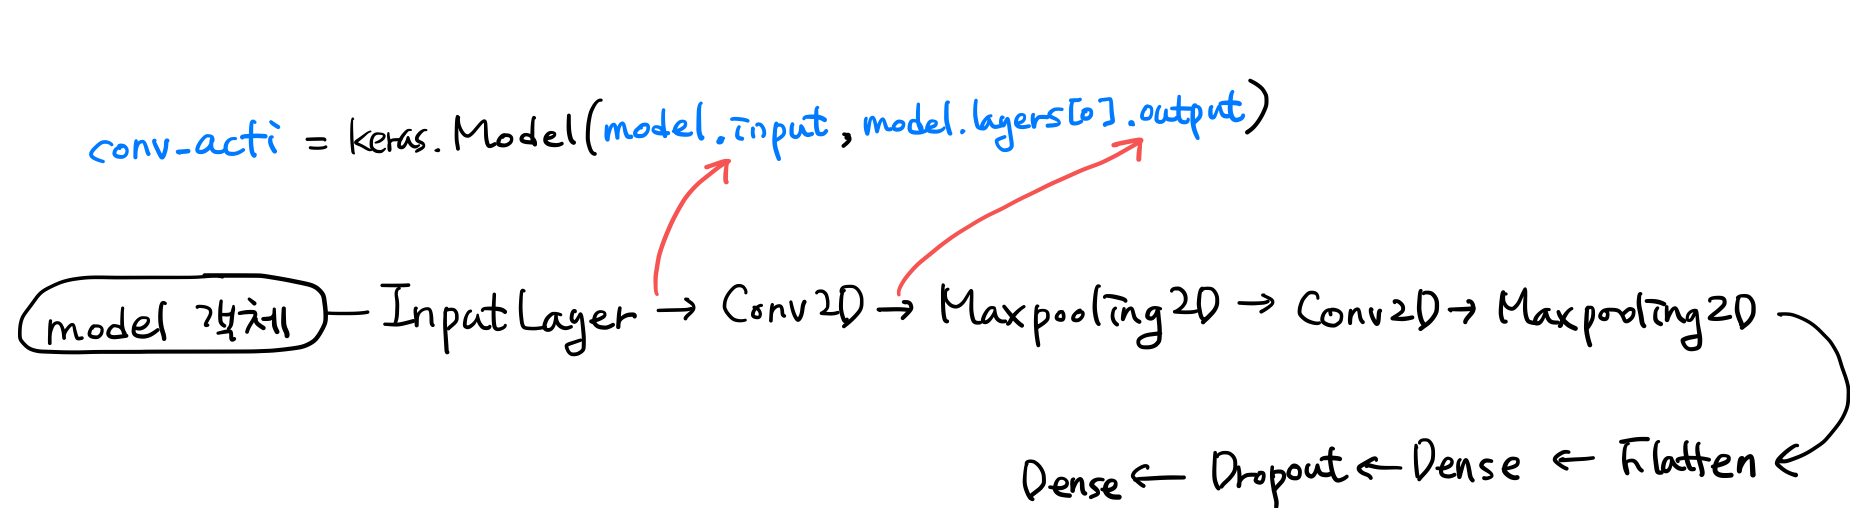

In [53]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


In [65]:
model.summary();

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

## 우리가 원하는 것
conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)  

### conv2d_4 -> max_pooling2d_2 여기 사이를 지나고 output 값을 원함!!
이러한 새로운 모델을 만들어보자

In [66]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 2.3. Feature Map Visualization

In [55]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

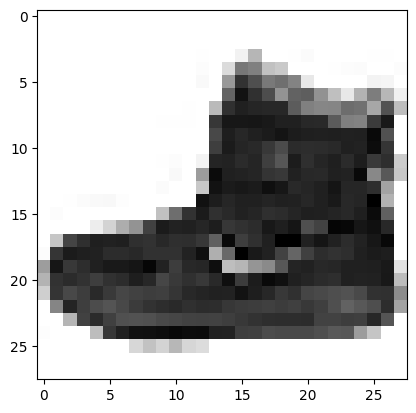

In [56]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [57]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 56ms/step


In [58]:
print(feature_maps.shape)

(1, 28, 28, 32)


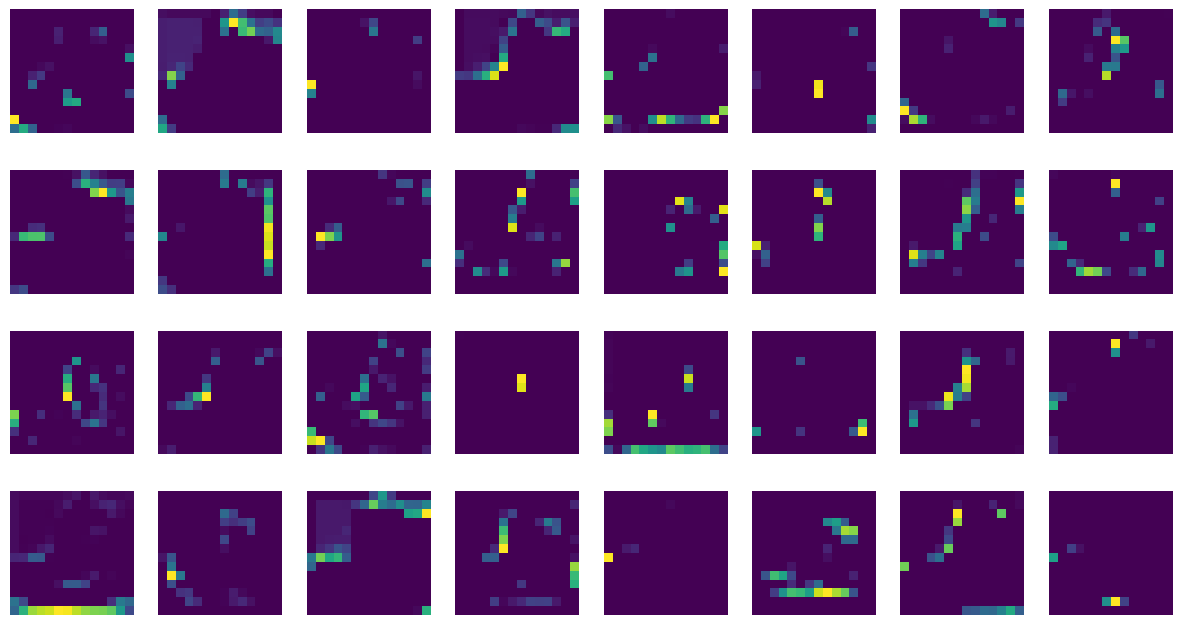

In [68]:
fig, axs = plt.subplots(4, 8, figsize=(15,8)) # 4x8의 특성맵 돌릴 때마다 달라짐

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [60]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [61]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 98ms/step


In [62]:
print(feature_maps.shape)

(1, 14, 14, 64)


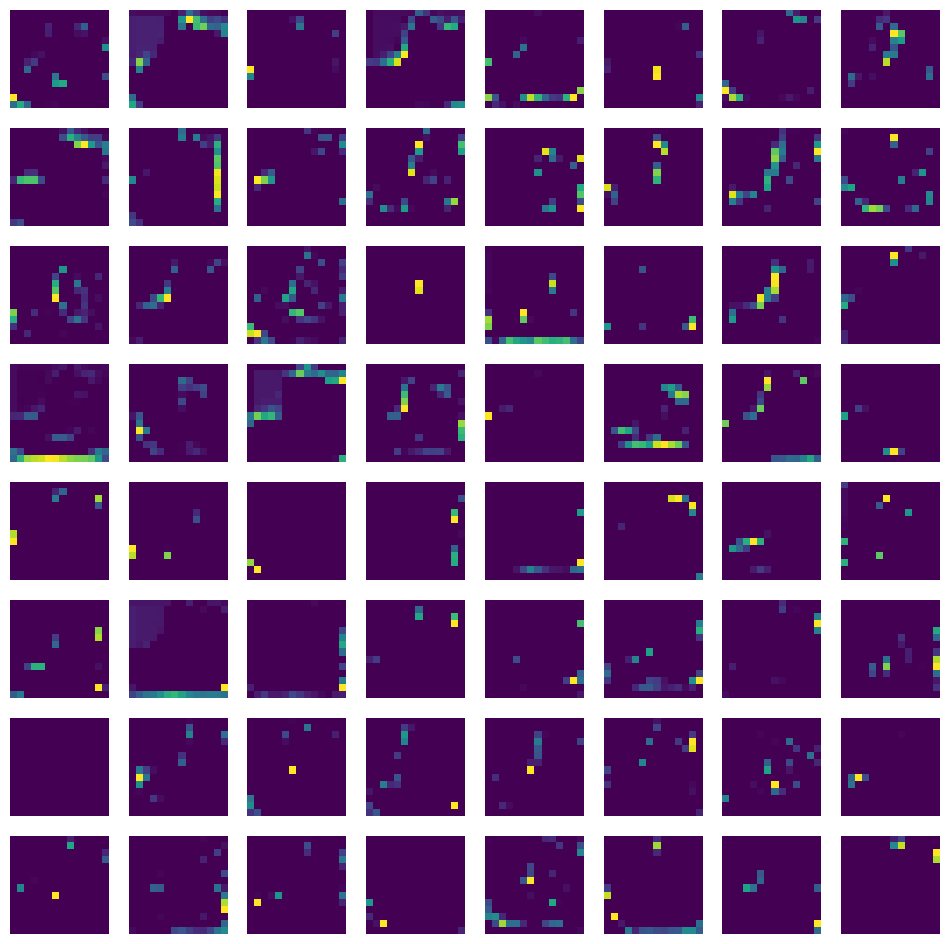

In [69]:
# 두번째 레이어까지 통과시켜봄
# 처음 이미지와는 거리가 멀어짐 -> 학습한 뭔가 중요한 값들 요 위치에 중요한 값이 있다~
# CNN은 이미지의 특성을 잘 뽑아냄
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()